## # PCA implemented manually:

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
A = np.array([
    [3, 7],
    [-4, -6],
    [7, 8],
    [1, -1], 
    [-4, -1],
    [-3, -7]
])
A

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [3]:
df = pd.DataFrame(A, columns=['A0', 'A1'])
df

,A0,A1
0,3,7
1,-4,-6
2,7,8
3,1,-1
4,-4,-1
5,-3,-7


### Note: `First and foremost we're supposed to standard normalize the data no matter what.`

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

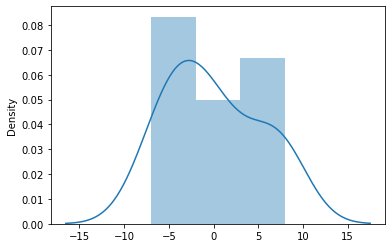

In [4]:
sns.distplot(df)

## `Covariance` and `Correlation` are two terms that are opposed and are both used in statistics and regression analysis. 
- ### `Covariance` shows you how the two variables differ, 
- ### whereas `Correlation` shows you how the two variables are related.

### # Covariance:

In [5]:
df.cov()

,A0,A1
A0,20.0,25.0
A1,25.0,40.0


In [6]:
A

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [7]:
### Covariance also = Transposeof(A) * A / n-1

sigma = A.T @ A/ (len(A)-1)
sigma

array([[20., 25.],
       [25., 40.]])

In [8]:
### Computing the eigenvalues and right eigenvectors of a square array i.e. the `Cov` matrix here 

np.linalg.eig(sigma)

(array([ 3.07417596, 56.92582404]),
 array([[-0.82806723, -0.56062881],
        [ 0.56062881, -0.82806723]]))

In [9]:
### Computing the eigenvalues and right eigenvectors of a square array i.e. the `Cov` matrix here 

vals, vecs = np.linalg.eig(sigma)
vals # principal components

array([ 3.07417596, 56.92582404])

### Note: The `PC1 (the First Principal Component)` will be `the higher val of Lambda`. And accordingly the <br><br>corrosponding vector will be the respective `Principal Component`.

In [10]:
vals # EigenVals

array([ 3.07417596, 56.92582404])

In [13]:
pd.DataFrame(vecs) # EigenVecs

,0,1
0,-0.828067,-0.560629
1,0.560629,-0.828067


In [14]:
### First Principal Component, PC1

print("The PC1: ")
A @ vecs[:, 1] # because of the higher eigen value

The PC1: 


array([ -7.47835704,   7.21091862, -10.54893951,   0.26743842,
         3.07058247,   7.47835704])

In [15]:
### Second Principal Component, PC2

print("The PC2: ")
A @ vecs[:, 0] # because of the lower eigen value

The PC2: 


array([ 1.44019997, -0.05150393, -1.31144014, -1.38869604,  2.75164011,
       -1.44019997])

In [16]:
pd.DataFrame(A).cov()

,0,1
0,20.0,25.0
1,25.0,40.0


### # Let's try to replicate the process on a different dataset: 

In [17]:
datasets = sns.get_dataset_names()
datasets

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [18]:
## Loading the penguin dataset

df1 = sns.load_dataset(datasets[-6])
df1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [19]:
dfx = df1.drop(columns=["species", "island", 'sex'])
dfx

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [20]:
### Standard Normalization of the relevant columns

scaler = StandardScaler()
dfx_scaled = scaler.fit_transform(dfx)

dfx1 = pd.DataFrame(dfx_scaled, columns=dfx.columns)
dfx1

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,NaN,NaN,NaN,NaN
4,-1.324737,1.089724,-0.563715,-0.938776
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,0.527932,-1.445897,1.003109,0.809516
341,1.188289,-0.735923,1.501644,1.933419
342,0.234440,-1.192335,0.789451,1.246590


In [21]:
dfx1.dropna(inplace=True)
dfx1

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
4,-1.324737,1.089724,-0.563715,-0.938776
5,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
338,0.601305,-1.750171,0.931890,0.903175
340,0.527932,-1.445897,1.003109,0.809516
341,1.188289,-0.735923,1.501644,1.933419
342,0.234440,-1.192335,0.789451,1.246590


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

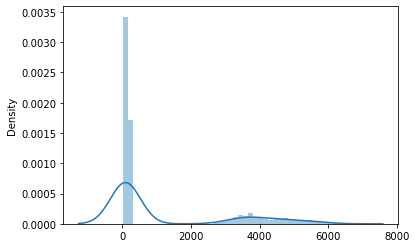

In [22]:
sns.distplot(dfx)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

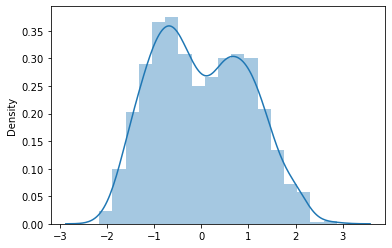

In [23]:
sns.distplot(dfx1)

In [24]:
import plotly.offline as iplot
import cufflinks as cf
cf.go_offline()

dfx.iplot(kind='hist', subplots=True)

In [25]:
dfx1.iplot(kind='hist', subplots=True)

### Standard Normalization done!

In [26]:
dfx1.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02
mean,-9.024620e-17,-1.793562e-15,-6.395144e-16,8.894769e-17
std,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00
min,-2.168526e+00,-2.054446e+00,-2.059320e+00,-1.875362e+00
25%,-8.615697e-01,-7.866355e-01,-7.773731e-01,-8.138982e-01
50%,9.686524e-02,7.547549e-02,-2.788381e-01,-1.895079e-01
75%,8.397670e-01,7.854492e-01,8.606705e-01,6.846384e-01
max,2.875868e+00,2.205397e+00,2.142618e+00,2.620248e+00


In [27]:
dfx1.shape

(342, 4)

In [28]:
sigma = dfx1.cov()
sigma

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.002933,-0.235742,0.658106,0.596855
bill_depth_mm,-0.235742,1.002933,-0.585563,-0.473300
flipper_length_mm,0.658106,-0.585563,1.002933,0.873757
body_mass_g,0.596855,-0.473300,0.873757,1.002933


In [29]:
### Now, let's find the EigenVal and EigenVec

vals, vecs = np.linalg.eig(sigma)
vals, vecs

(array([2.76183065, 0.7747822 , 0.36630698, 0.10881037]),
 array([[-0.45525033,  0.59703114,  0.64430115,  0.14552311],
        [ 0.40033468,  0.79776657, -0.41842724, -0.16798597],
        [-0.57601332,  0.0022822 , -0.23208397, -0.78379875],
        [-0.54835019,  0.08436292, -0.59660012,  0.57988211]]))

In [30]:
vals.max()

2.761830652115729

In [31]:
vecs[:, 0]

array([-0.45525033,  0.40033468, -0.57601332, -0.54835019])

In [38]:
print(dfx.shape)
vecs[:, 0].shape

(344, 4)


(4,)

In [39]:
## PC1

dfx1 @ vecs[:, 0]

0      1.843445
1      1.306762
2      1.369181
4      1.878827
5      1.911748
         ...   
338   -2.006436
340   -1.840886
341   -2.760742
342   -1.722364
343   -2.028902
Length: 342, dtype: float64

In [40]:
### PC2

dfx1 @  vecs[:, 1]

0      0.047702
1     -0.428348
2     -0.154476
4     -0.002048
5      0.829210
         ...   
338   -0.958909
340   -0.767714
341    0.288886
342   -0.704269
343    0.357620
Length: 342, dtype: float64

### # Replicating the process on yet another dataset:

In [41]:
df2 = pd.read_csv("https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv")
df2

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [42]:
df2_r = df2.drop(columns=['Id number', 'Type of glass'])
df2_r

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [43]:
df2_r.iplot(kind='hist', subplots=True)

In [44]:
### Standard Normalization

scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2_r)

df2_scaled = pd.DataFrame(df2_scaled, columns=df2_r.columns)
df2_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [45]:
## Covariance

sig = df2_scaled.cov()
sig

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.004695,-0.192786,-0.122848,-0.409238,-0.544597,-0.291193,0.814207,-0.000388,0.143681
Na,-0.192786,1.004695,-0.275017,0.157530,-0.070137,-0.267336,-0.276736,0.328136,-0.242479
Mg,-0.122848,-0.275017,1.004695,-0.484060,-0.166706,0.005421,-0.445833,-0.494573,0.083449
Al,-0.409238,0.157530,-0.484060,1.004695,-0.005550,0.327489,-0.260811,0.481655,-0.074751
Si,-0.544597,-0.070137,-0.166706,-0.005550,1.004695,-0.194239,-0.209712,-0.102631,-0.094643
K,-0.291193,-0.267336,0.005421,0.327489,-0.194239,1.004695,-0.319328,-0.042818,-0.007755
Ca,0.814207,-0.276736,-0.445833,-0.260811,-0.209712,-0.319328,1.004695,-0.113371,0.125555
Ba,-0.000388,0.328136,-0.494573,0.481655,-0.102631,-0.042818,-0.113371,1.004695,-0.058967
Fe,0.143681,-0.242479,0.083449,-0.074751,-0.094643,-0.007755,0.125555,-0.058967,1.004695


In [46]:
### Finding the Principal axes

vals2, vecs2 = np.linalg.eig(sig)
vals2, vecs2

(array([2.52295323e+00, 2.05969694e+00, 1.41143951e+00, 1.16329842e+00,
        9.18293337e-01, 5.30112353e-01, 3.70690643e-01, 6.41527269e-02,
        1.61637096e-03]),
 array([[-0.54517662,  0.28568318,  0.08691083, -0.14738099,  0.0735427 ,
         -0.11528772, -0.08186724, -0.7522159 ,  0.02573194],
        [ 0.2581256 ,  0.27035007, -0.38491962, -0.49124204, -0.1536833 ,
          0.55811757, -0.14858006, -0.12769315, -0.31193718],
        [-0.11088095, -0.59355826,  0.00841796, -0.37878577, -0.12350912,
         -0.30818598,  0.20604537, -0.07689061, -0.57727335],
        [ 0.42870863,  0.29521154,  0.32923712,  0.13750592, -0.01410888,
          0.01885731,  0.69923557, -0.27444105, -0.19222686],
        [ 0.22883635, -0.15509891, -0.45870884,  0.65253771, -0.00850012,
         -0.08609797, -0.21606658, -0.37992298, -0.29807321],
        [ 0.21934405, -0.15397013,  0.66257412,  0.03853544,  0.30703984,
          0.24363237, -0.50412141, -0.10981168, -0.26050863],
        [-0.49

In [47]:
### PC1

pc1 = df2_scaled @ vecs2[:, 0]
print(type(pc1))
pc1

<class 'pandas.core.series.Series'>


0     -1.151140
1      0.574137
2      0.940160
3      0.142083
4      0.351092
         ...   
209    2.383835
210    2.397652
211    1.680246
212    2.369748
213    2.262649
Length: 214, dtype: float64

In [48]:
vals2

array([2.52295323e+00, 2.05969694e+00, 1.41143951e+00, 1.16329842e+00,
       9.18293337e-01, 5.30112353e-01, 3.70690643e-01, 6.41527269e-02,
       1.61637096e-03])

In [49]:
vals2.sort()
vals2

array([1.61637096e-03, 6.41527269e-02, 3.70690643e-01, 5.30112353e-01,
       9.18293337e-01, 1.16329842e+00, 1.41143951e+00, 2.05969694e+00,
       2.52295323e+00])

In [50]:
### PC2

pc2 = df2_scaled @ vecs2[:, 1]
print("PC2: ")
pc2

PC2: 


0     -0.529488
1     -0.759788
2     -0.929836
3     -0.961677
4     -1.091249
         ...   
209    3.061677
210    3.108236
211    3.284823
212    2.756873
213    3.028592
Length: 214, dtype: float64

In [51]:
pc1.shape

(214,)

### # Ways to prove that the consequent Principal Axes are actually represent the dataset:

- ### `Product of PC1 and PC2 matrices must be 0. (property of matrix)`
- ### `Reverse engineer the step and see if you're able to get the original dataset.`
- ### `Cross-check w the scikit-learn library.`

In [52]:
from sklearn.decomposition import PCA

In [53]:
## Components: PC1 and PC2

pca = PCA(n_components=2)
comps = pca.fit_transform(df2_scaled)
comps

array([[ 1.15113957e+00, -5.29487638e-01],
       [-5.74137172e-01, -7.59787774e-01],
       [-9.40159722e-01, -9.29835966e-01],
       [-1.42083283e-01, -9.61677440e-01],
       [-3.51092291e-01, -1.09124921e+00],
       [-2.90266583e-01, -1.32400756e+00],
       [-2.52671444e-01, -1.11614958e+00],
       [-1.20299466e-01, -1.22184622e+00],
       [-2.08160308e-02, -3.21932609e-01],
       [-2.35222894e-03, -1.06581344e+00],
       [-3.82514937e-01, -1.38013403e+00],
       [-1.33538675e-02, -1.10471913e+00],
       [-3.09724390e-01, -1.42304024e+00],
       [ 1.56521013e-01, -1.23592823e+00],
       [-8.99566628e-02, -1.18125211e+00],
       [-1.15255023e-01, -1.16028212e+00],
       [ 1.73458320e-01, -1.18243967e+00],
       [ 1.45812372e+00,  9.88413780e-02],
       [ 5.47316267e-01, -2.95660130e-01],
       [-3.08817022e-01, -7.63162157e-01],
       [ 2.05673879e-01, -9.99182661e-01],
       [ 1.21605345e+00, -4.36896108e-01],
       [ 4.11679297e-02, -1.02788338e+00],
       [-1.

In [54]:
# Components

pc1_ = comps[:, 0]
pc1_

array([ 1.15113957e+00, -5.74137172e-01, -9.40159722e-01, -1.42083283e-01,
       -3.51092291e-01, -2.90266583e-01, -2.52671444e-01, -1.20299466e-01,
       -2.08160308e-02, -2.35222894e-03, -3.82514937e-01, -1.33538675e-02,
       -3.09724390e-01,  1.56521013e-01, -8.99566628e-02, -1.15255023e-01,
        1.73458320e-01,  1.45812372e+00,  5.47316267e-01, -3.08817022e-01,
        2.05673879e-01,  1.21605345e+00,  4.11679297e-02, -1.13206012e-01,
       -1.47523366e-01, -5.04865218e-02, -1.55773980e-01, -2.17093779e-01,
       -1.15093633e-01, -6.58374915e-02,  2.98261451e-01, -2.22363433e-02,
        3.96586112e-01, -6.90862734e-02,  8.17537725e-02, -3.88918640e-01,
        2.57422809e-01,  2.70430953e-02,  1.93311245e+00,  1.93311245e+00,
        2.13978802e-01,  1.73653764e-02, -9.91042449e-02,  1.90784649e+00,
        7.55238909e-01,  4.15149070e-01,  6.04423395e-01,  2.97136159e+00,
        2.07281161e+00,  3.93111591e-01,  2.72721095e+00,  7.23068883e-01,
        1.06160451e-01,  

In [55]:
np.array(pc1)

array([-1.15113957e+00,  5.74137172e-01,  9.40159722e-01,  1.42083283e-01,
        3.51092291e-01,  2.90266583e-01,  2.52671444e-01,  1.20299466e-01,
        2.08160308e-02,  2.35222894e-03,  3.82514937e-01,  1.33538675e-02,
        3.09724390e-01, -1.56521013e-01,  8.99566628e-02,  1.15255023e-01,
       -1.73458320e-01, -1.45812372e+00, -5.47316267e-01,  3.08817022e-01,
       -2.05673879e-01, -1.21605345e+00, -4.11679297e-02,  1.13206012e-01,
        1.47523366e-01,  5.04865218e-02,  1.55773980e-01,  2.17093779e-01,
        1.15093633e-01,  6.58374915e-02, -2.98261451e-01,  2.22363433e-02,
       -3.96586112e-01,  6.90862734e-02, -8.17537725e-02,  3.88918640e-01,
       -2.57422809e-01, -2.70430953e-02, -1.93311245e+00, -1.93311245e+00,
       -2.13978802e-01, -1.73653764e-02,  9.91042449e-02, -1.90784649e+00,
       -7.55238909e-01, -4.15149070e-01, -6.04423395e-01, -2.97136159e+00,
       -2.07281161e+00, -3.93111591e-01, -2.72721095e+00, -7.23068883e-01,
       -1.06160451e-01, -

In [56]:
### Let's see how many pricipal axes are we supposed to select
## Let's plot Screen Plot

In [57]:
pca = PCA()
pcs = pca.fit_transform(df2_scaled)
pcs

array([[ 1.15113957, -0.52948764, -0.37209565, ..., -0.39560005,
        -0.19716008,  0.01634649],
       [-0.57413717, -0.75978777, -0.55670817, ..., -0.02415793,
        -0.28421356, -0.0107898 ],
       [-0.94015972, -0.92983597, -0.55490744, ..., -0.36751757,
        -0.09594067,  0.02164019],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, ...,  0.67412231,
        -0.89170969,  0.04628358],
       [-2.36974768,  2.7568728 , -1.23470076, ...,  0.67889932,
         0.07446015, -0.02730068],
       [-2.26264885,  3.02859155, -0.89084474, ...,  0.46246107,
         0.0633149 , -0.01944978]])

In [58]:
## EVRs

evrs = pca.explained_variance_ratio_
evrs

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [59]:
np.cumsum(evrs)

array([0.27901819, 0.50680399, 0.66289777, 0.79154915, 0.89310496,
       0.95173109, 0.99272647, 0.99982124, 1.        ])

Text(0.5, 1.0, 'Screen Plot')

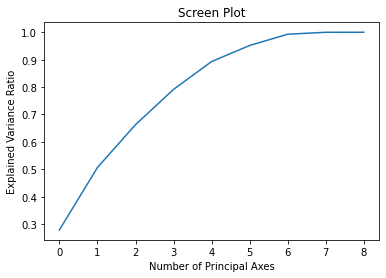

In [60]:
## Screen Plot

import matplotlib.pyplot as plt

plt.figure()
sns.lineplot(data=np.cumsum(evrs))
plt.xlabel("Number of Principal Axes")
plt.ylabel("Explained Variance Ratio")
plt.title("Screen Plot")